In [16]:
#Problem statement-This project aims to develop a trading strategy analysis tool that backtests Moving Average Crossover and Dynamic Support-Resistance strategies. The focus will be particularly to create a "Shrinking EMA difference with enlarging volume confluence" strategy. It implements machine learning algorithms (KNN, SVM, Regression) for strategy optimization. Finally, it also aims to outperform indices and calculation of Sharpe ratio after implementation. 


import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

In [17]:
df = pd.read_csv('NIFTY.csv')

-318227.9203321964
0.3569272954142621


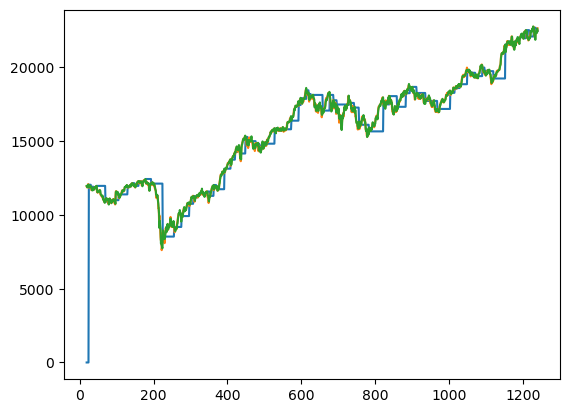

In [35]:
ema9 = []
summ = 0

for x in range (8):
    ema9.append(0)
    closer = df.loc[x,"Close"]
    summ += closer
    
ema9.append((closer + summ)/9)
    
for x in range (9,1240):
    closer = df.loc[x,"Close"]
    ema9.append(closer*0.1 + ema9[x-1]*0.9)
    
ema19 = []
sum1 = 0

for x in range (18):
    ema19.append(0)
    closer = df.loc[x,"Close"]
    sum1 += closer
    
ema19.append((closer + sum1)/19)

for x in range (19,1240):
    closer = df.loc[x,"Close"]
    ema19.append(closer*0.05 + ema19[x-1]*0.95)
    
emadiff = []

for x in range (0,18):
    emadiff.append(0)
    
for x in range (18,1240):
    emadiff.append(ema9[x] - ema19[x])
    
holding = 0
holdingday = 0
holdingnumber = 0
pricebought = 0
principal = 1000000
long =0
short =0
currentbuynsell=0
buy = []
day = []
close = []
opening = []
mean = 0
counter=0
for x in range (19,1240):
    low = df.loc[x,"Low"]
    opener = df.loc[x,"Open"]
    closer = df.loc[x,"Close"]
    high = df.loc[x,"High"]
    close.append(closer)
    opening.append(opener)
    
    day.append(x)
    if (emadiff[x] < emadiff[x-1] and high > ema9[x] and high > ema19[x] and long==0 and short==0):
        if (opener > ema19[x] and opener > ema9[x]):
            holdingnumber = int(principal/opener)
            holding = holdingnumber*opener
            pricebought = opener
            
        else:
            holdingnumber = int(principal/max(ema19[x],ema9[x]))
            holding = holdingnumber*max(ema19[x],ema9[x])
            pricebought = max(ema19[x],ema9[x])
        if currentbuynsell!=0:
            mean+=(pricebought-currentbuynsell)/currentbuynsell
            counter+=1
        currentbuynsell = pricebought
        holdingday = x
        long = 1
        
    elif ((low < pricebought*0.95 or x == holdingday + 5) and short ==0 and long == 1):
        long = 0 
        if (low < pricebought*0.95):
            principal = principal - holding*0.05
        else:
            principal = principal + closer*holdingnumber - holding
        if currentbuynsell!=0:
            mean+=(pricebought-currentbuynsell)/currentbuynsell
            counter+=1
        currentbuynsell = pricebought
        
            
    elif (emadiff[x] > emadiff[x-1] and high < ema9[x] and high < ema19[x] and long==0 and short==0):
        if (opener < ema19[x] and opener < ema9[x]):
            holdingnumber = int(principal/opener)
            holding = holdingnumber*opener
            pricebought = opener
        else:
            holdingnumber = int(principal/min(ema19[x],ema9[x]))
            holding = holdingnumber*min(ema19[x],ema9[x])
            pricebought = min(ema19[x],ema9[x])
        if currentbuynsell!=0:
            mean+=(pricebought-currentbuynsell)/currentbuynsell
            counter+=1
        currentbuynsell = pricebought
        holdingday = x
        short = 1
    
    elif ((high > pricebought*1.05 or x == holdingday + 5) and short == 1 and long == 0):
        short = 0 
        if (high > pricebought*1.05):
            principal = principal - holding*0.05
        else:
            principal = principal - closer*holdingnumber + holding
        if currentbuynsell!=0:
            mean+=(pricebought-currentbuynsell)/currentbuynsell
            counter+=1
        currentbuynsell = pricebought
    buy.append(currentbuynsell)
mean/=counter/100
principal1=0
holding = 0
holdingday = 0
holdingnumber = 0
pricebought = 0
long =0
short =0
currentbuynsell=0
var=0
stddev=0
for x in range (19,1240):
    low = df.loc[x,"Low"]
    opener = df.loc[x,"Open"]
    closer = df.loc[x,"Close"]
    high = df.loc[x,"High"]
    
    
    if (emadiff[x] < emadiff[x-1] and high > ema9[x] and high > ema19[x] and long==0 and short==0):
        if (opener > ema19[x] and opener > ema9[x]):
            holdingnumber = int(principal1/opener)
            holding = holdingnumber*opener
            pricebought = opener
            
        else:
            holdingnumber = int(principal1/max(ema19[x],ema9[x]))
            holding = holdingnumber*max(ema19[x],ema9[x])
            pricebought = max(ema19[x],ema9[x])
        if currentbuynsell!=0:
            var=((pricebought-currentbuynsell)/currentbuynsell)*100
        currentbuynsell = pricebought
        holdingday = x
        long = 1
        
    elif ((low < pricebought*0.95 or x == holdingday + 5) and short ==0 and long == 1):
        long = 0 
        if (low < pricebought*0.95):
            principal1 = principal1 - holding*0.05
        else:
            principal1 = principal1 + closer*holdingnumber - holding
        if currentbuynsell!=0:
            var=((pricebought-currentbuynsell)/currentbuynsell)*100
        currentbuynsell = pricebought
        
            
    elif (emadiff[x] > emadiff[x-1] and high < ema9[x] and high < ema19[x] and long==0 and short==0):
        if (opener < ema19[x] and opener < ema9[x]):
            holdingnumber = int(principal1/opener)
            holding = holdingnumber*opener
            pricebought = opener
        else:
            holdingnumber = int(principal1/min(ema19[x],ema9[x]))
            holding = holdingnumber*min(ema19[x],ema9[x])
            pricebought = min(ema19[x],ema9[x])
        if currentbuynsell!=0:
            var=((pricebought-currentbuynsell)/currentbuynsell)*100
        currentbuynsell = pricebought
        holdingday = x
        short = 1
    
    elif ((high > pricebought*1.05 or x == holdingday + 5) and short == 1 and long == 0):
        short = 0 
        if (high > pricebought*1.05):
            principal1 = principal1 - holding*0.05
        else:
            principal1 = principal1 - closer*holdingnumber + holding
        if currentbuynsell!=0:
            var=((pricebought-currentbuynsell)/currentbuynsell)*100
        currentbuynsell = pricebought
    stddev+=(var-mean)**2
stddev/=counter
stddev=sqrt(stddev)


plt.plot(day, buy)
plt.plot(day, close)
plt.plot(day,opening)
print(principal-1000000)
print(mean)
        
        
        
        
    

In [36]:
sharperatio = (((principal-1000000)/10000)-8)/stddev
print(stddev)
print(sharperatio)

6.087860198886325
-6.541344697847131
